# Random Forest Project

**Objective:** 

I will focus on applying the 'Random tree' machine learning model to train the dataset and compare the performance between the accuracy with the model done in the previous proyect, 'Decision Tree'.

This view would allow us to improve the effectiveness of the model when an individual tree is not sufficient.

--------------------------------------------------------------------------------------

The following assesment will display the differences between 'Decision Tree' and 'Random Forest' models.

**Step 1: Applying the Reloaded 'Decision Tree' Model**

First, we will evaluate the performance of the reloaded Decision Tree model over the training and testing datasets. This includes computing the confusion matrix, classification report, and accuracy.

In [17]:
# Reloading the 'Decision Tree' model:

from pickle import load

DT_loaded_model = load(open("../models/tree_classifier_crit-entropy_maxdepth-5_minleaf-4_minsplit2_42.sav", "rb"))

In [18]:
# Applying the 'Decision Tree' model:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Reload datasets
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,72.0,27.235457,32.3,0.304,21.0,0
1,9.0,112.0,82.0,24.000000,28.2,1.282,50.0,1
2,1.0,139.0,46.0,19.000000,28.7,0.654,22.0,0
3,0.0,161.0,50.0,27.235457,21.9,0.254,65.0,0
4,6.0,134.0,80.0,37.000000,46.2,0.238,46.0,1


In [20]:
# Separate features and target
X_train = train_data.drop("Outcome", axis=1)  # Replace 'Outcome' with your target variable
y_train = train_data["Outcome"]
X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]


DT_loaded_model = DecisionTreeClassifier(
    criterion="entropy", max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=42
)
DT_loaded_model.fit(X_train, y_train)

# Predictions on train and test datasets
y_train_pred = DT_loaded_model.predict(X_train)
y_test_pred = DT_loaded_model.predict(X_test)

# Training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (Decision Tree): {train_accuracy:.2f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (Decision Tree): {test_accuracy:.2f}")

Training Accuracy (Decision Tree): 0.88
Test Accuracy (Decision Tree): 0.75



Classification Report (Test Data - Decision Tree):
              precision    recall  f1-score   support

 No Diabetes       0.79      0.84      0.81        99
    Diabetes       0.67      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



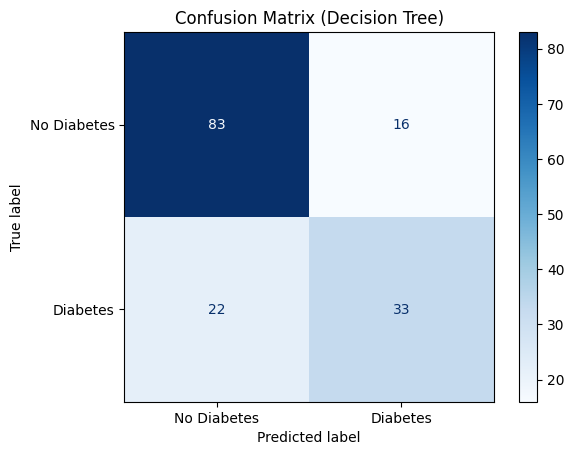

In [21]:
# Classification report
print("\nClassification Report (Test Data - Decision Tree):")
print(classification_report(y_test, y_test_pred, target_names=["No Diabetes", "Diabetes"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

**Step 2: Optimizing the 'Decision Tree' Model**

We will follow the provided GridSearchCV workflow to optimize the Decision Tree model and compare its performance.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

# Initialize the model
tree_model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=tree_model,
    param_grid=hyperparams,
    scoring="accuracy",
    cv=10,
    verbose=1,
    refit=True
)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

# Display the best hyperparameters and the corresponding score
print(f"Best Hyperparameters: {grid.best_params_}")
print(f"Best CV Accuracy: {grid.best_score_:.2f}")

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Accuracy: 0.81


In [24]:
# Retrieve the best model
best_model = grid.best_estimator_

# Evaluate the optimized Decision Tree model
y_train_pred_opt = best_model.predict(X_train)
train_accuracy_opt = accuracy_score(y_train, y_train_pred_opt)
print(f"Training Accuracy (Optimized Decision Tree): {train_accuracy_opt:.2f}")

y_test_pred_opt = best_model.predict(X_test)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)
print(f"Test Accuracy (Optimized Decision Tree): {test_accuracy_opt:.2f}")

Training Accuracy (Optimized Decision Tree): 0.90
Test Accuracy (Optimized Decision Tree): 0.73



Classification Report (Optimized Decision Tree):
              precision    recall  f1-score   support

 No Diabetes       0.81      0.75      0.78        99
    Diabetes       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



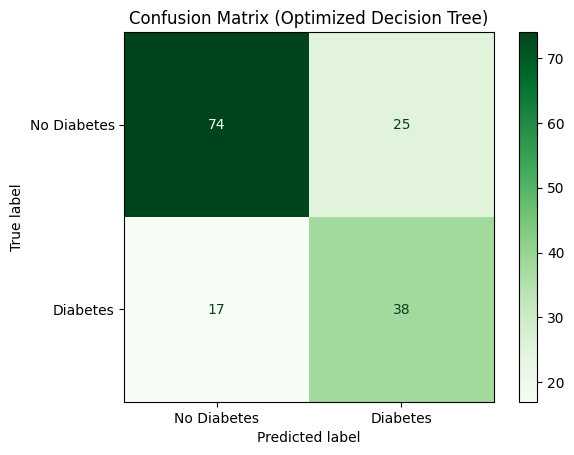

In [ ]:
# Classification report:
print("\nClassification Report (Optimized Decision Tree):")
print(classification_report(y_test, y_test_pred_opt, target_names=["No Diabetes", "Diabetes"]))

# Confusion matrix:
conf_matrix_opt = confusion_matrix(y_test, y_test_pred_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_opt, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix (Optimized Decision Tree)")
plt.show()

**Step 3: Building the 'Random Forest' Model**

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Calling 'Random Forest' model:
rf_model = RandomForestClassifier(n_estimators=60, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the accuracy:
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy (Random Forest): {train_accuracy_rf:.2f}")

y_test_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy (Random Forest): {test_accuracy_rf:.2f}")

Training Accuracy (Random Forest): 1.00
Test Accuracy (Random Forest): 0.81



Classification Report (Random Forest):
              precision    recall  f1-score   support

 No Diabetes       0.86      0.85      0.85        99
    Diabetes       0.73      0.75      0.74        55

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154



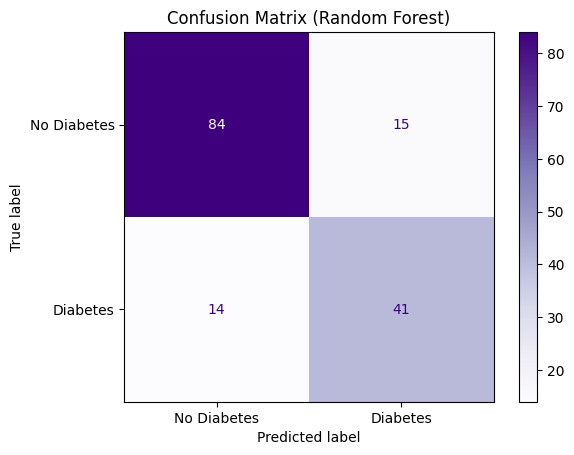

In [ ]:
# Classification report:
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_test_pred_rf, target_names=["No Diabetes", "Diabetes"]))

# Confusion matrix:
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

-----------------------------------------------------------------------------------------

# Conclusions

**<ins>Performance Analysis</ins>**

*Decision Tree:*

Training Accuracy (Decision Tree): 0.88

Test Accuracy (Decision Tree): 0.75

------------------------------------------------------

*Decision Tree - Optimised:*

Training Accuracy (Optimized Decision Tree): 0.90

Test Accuracy (Optimized Decision Tree): 0.73

------------------------------------------------------

*Random Forest:*

Training Accuracy (Random Forest): 1.00

Test Accuracy (Random Forest): 0.81

**<ins>Interpretation:</ins>**

High training accuracy vs prediction in 'Decision Tree' and 'Decision Tree Optimised' suggests overfitting. The model is learning the training data too well, including noise.
HOwever, this seem to improve by applying the 'Random Forest' model to the exact same dataset.

Comparing the noise matrix of both models, we can see a very good prediction rate for true positives and negatives, only leaving 14 cases for false negatives and 15 cases for false positives, which is a good indicator.

Based on this analysis, **Random Forest is the better model for this particular study**. It balances performance metrics across classes, generalizes better, and provides a more reliable framework for predicting "Diabetes" outcomes.